In [24]:
import sqlite3
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Recommendations

You have to use the data available in the dataset folder. 

Try to answer the questions using python.

Be clear and get straight to the point in your answers.

Good job!

In [65]:
try:
    conn = sqlite3.connect("weather.db")
    with open("grid_weather_data.sql", "r") as file:
        sql_scripts = file.read()
    
    cursor = conn.cursor()
    cursor.executescript(sql_scripts)
except sqlite3.OperationalError:
    print("Table already exist!")

Table already exist!


In [66]:
query = "SELECT * FROM grid_weather_data"
df = pd.read_sql_query(query, conn)

<hr>

### Question 1

Try to clean/aggregate the data from grid_weather_data.sql in order to avoid NULL (or NaN) values.

In [70]:
df

,cod_city,date,hour,precipitation,dry_bulb_temperature,wet_bulb_temperature,high_temperature,low_temperature,relative_humidity,relative_humidity_avg,pressure,sea_pressure,wind_direction,wind_speed_avg,cloud_cover,evaporation,month,year,day
0,59999,1976-09-01,10.0,NaN,30.30,19.55,34.1,14.4,38.00,23.12,979.75,NaN,14.00,52.00,10.0,4.50,9,1976,1
1,59999,1976-09-02,10.0,0.0,27.23,18.03,34.6,NaN,44.00,20.50,979.00,NaN,13.67,49.00,11.2,1.33,9,1976,2
2,59999,1976-09-03,10.0,0.0,27.90,18.23,35.8,14.0,43.33,24.06,978.40,NaN,10.67,47.25,10.7,2.33,9,1976,3
3,59999,1976-09-04,10.0,0.0,27.60,18.77,34.5,16.6,45.33,24.36,978.23,NaN,11.00,49.00,10.6,3.00,9,1976,4
4,59999,1976-09-05,10.0,0.0,28.40,18.80,36.0,14.1,43.00,24.04,977.27,NaN,22.67,52.00,10.6,4.67,9,1976,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,60046,2017-12-09,10.0,54.8,25.07,NaN,33.6,21.1,89.00,24.22,962.73,1010.77,7.67,93.00,2.6,9.00,12,2017,9
40055,60046,2017-12-10,10.0,42.4,24.07,NaN,28.7,21.9,92.00,24.24,962.17,1010.30,21.33,92.25,2.5,9.50,12,2017,10
40056,60046,2017-12-11,10.0,7.0,22.40,NaN,28.7,21.1,98.67,23.04,963.03,1010.90,0.00,100.00,0.1,10.00,12,2017,11
40057,60046,2017-12-12,10.0,90.1,22.87,NaN,27.4,20.0,98.33,22.96,963.03,1011.27,12.00,97.25,1.1,10.00,12,2017,12


In [68]:
df["date"] = pd.to_datetime(df["date"])

In [69]:
df = df.groupby(["cod_city", pd.Grouper(key="date", axis=0, freq="D")]).mean().round(2).reset_index()
df["month"] = pd.to_datetime(df["date"]).dt.month
df["year"] = pd.to_datetime(df["date"]).dt.year
df["day"] = pd.to_datetime(df["date"]).dt.day

In [29]:
df.isna().sum()

cod_city                     0
date                         0
hour                         0
precipitation             1368
dry_bulb_temperature      1982
wet_bulb_temperature      5180
high_temperature          3835
low_temperature           3380
relative_humidity         3189
relative_humidity_avg     6411
pressure                  6500
sea_pressure             23743
wind_direction            3370
wind_speed_avg            7459
cloud_cover               5751
evaporation               2835
month                        0
year                         0
day                          0
dtype: int64

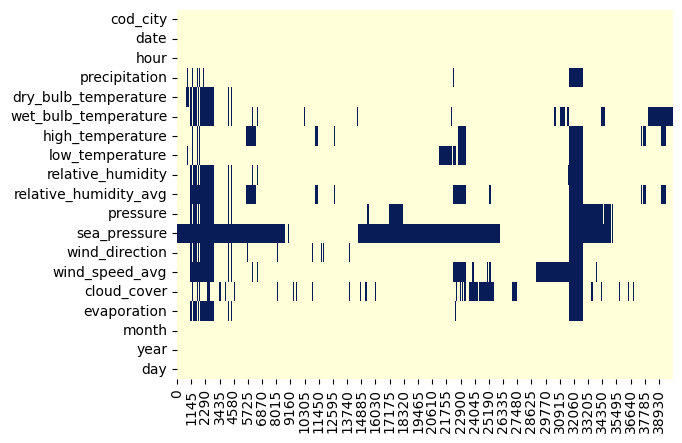

In [75]:
sns.heatmap(df.isna().T, cmap="YlGnBu", cbar=False)
plt.show()

In [76]:
df.drop(["sea_pressure", "hour"], axis=1, inplace=True)

In [77]:
df

,cod_city,date,precipitation,dry_bulb_temperature,wet_bulb_temperature,high_temperature,low_temperature,relative_humidity,relative_humidity_avg,pressure,wind_direction,wind_speed_avg,cloud_cover,evaporation,month,year,day
0,59999,1976-09-01,NaN,30.30,19.55,34.1,14.4,38.00,23.12,979.75,14.00,52.00,10.0,4.50,9,1976,1
1,59999,1976-09-02,0.0,27.23,18.03,34.6,NaN,44.00,20.50,979.00,13.67,49.00,11.2,1.33,9,1976,2
2,59999,1976-09-03,0.0,27.90,18.23,35.8,14.0,43.33,24.06,978.40,10.67,47.25,10.7,2.33,9,1976,3
3,59999,1976-09-04,0.0,27.60,18.77,34.5,16.6,45.33,24.36,978.23,11.00,49.00,10.6,3.00,9,1976,4
4,59999,1976-09-05,0.0,28.40,18.80,36.0,14.1,43.00,24.04,977.27,22.67,52.00,10.6,4.67,9,1976,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,60046,2017-12-09,54.8,25.07,NaN,33.6,21.1,89.00,24.22,962.73,7.67,93.00,2.6,9.00,12,2017,9
40055,60046,2017-12-10,42.4,24.07,NaN,28.7,21.9,92.00,24.24,962.17,21.33,92.25,2.5,9.50,12,2017,10
40056,60046,2017-12-11,7.0,22.40,NaN,28.7,21.1,98.67,23.04,963.03,0.00,100.00,0.1,10.00,12,2017,11
40057,60046,2017-12-12,90.1,22.87,NaN,27.4,20.0,98.33,22.96,963.03,12.00,97.25,1.1,10.00,12,2017,12


In [78]:
df["precipitation"].fillna(0, inplace=True)
df.iloc[:, 3:] = df.iloc[:, 3:].fillna(df.iloc[:, 3:].mean())

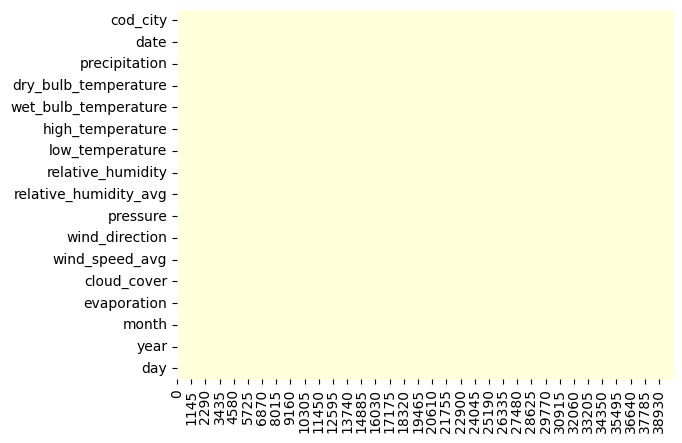

In [79]:
sns.heatmap(df.isna().T, cmap="YlGnBu", cbar=False)
plt.show()

<hr>

### Question 2

What was the precipitation mean of each city throughout 2002?

In [80]:
df

,cod_city,date,precipitation,dry_bulb_temperature,wet_bulb_temperature,high_temperature,low_temperature,relative_humidity,relative_humidity_avg,pressure,wind_direction,wind_speed_avg,cloud_cover,evaporation,month,year,day
0,59999,1976-09-01,0.0,30.30,19.55000,34.100000,14.400000,38.00,23.120000,979.75,14.00,52.000000,10.000000,4.50,9,1976,1
1,59999,1976-09-02,0.0,27.23,18.03000,34.600000,19.738363,44.00,20.500000,979.00,13.67,49.000000,11.200000,1.33,9,1976,2
2,59999,1976-09-03,0.0,27.90,18.23000,35.800000,14.000000,43.33,24.060000,978.40,10.67,47.250000,10.700000,2.33,9,1976,3
3,59999,1976-09-04,0.0,27.60,18.77000,34.500000,16.600000,45.33,24.360000,978.23,11.00,49.000000,10.600000,3.00,9,1976,4
4,59999,1976-09-05,0.0,28.40,18.80000,36.000000,14.100000,43.00,24.040000,977.27,22.67,52.000000,10.600000,4.67,9,1976,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,60046,2017-12-09,54.8,25.07,21.93242,33.600000,21.100000,89.00,24.220000,962.73,7.67,93.000000,2.600000,9.00,12,2017,9
40055,60046,2017-12-10,42.4,24.07,21.93242,28.700000,21.900000,92.00,24.240000,962.17,21.33,92.250000,2.500000,9.50,12,2017,10
40056,60046,2017-12-11,7.0,22.40,21.93242,28.700000,21.100000,98.67,23.040000,963.03,0.00,100.000000,0.100000,10.00,12,2017,11
40057,60046,2017-12-12,90.1,22.87,21.93242,27.400000,20.000000,98.33,22.960000,963.03,12.00,97.250000,1.100000,10.00,12,2017,12


In [81]:
df[df["year"] == 2017].groupby("cod_city")["precipitation"].mean()

cod_city
59999    3.416715
60020    1.911594
60046    6.092754
Name: precipitation, dtype: float64

<hr>

### Question 3

Which features have some correlation?

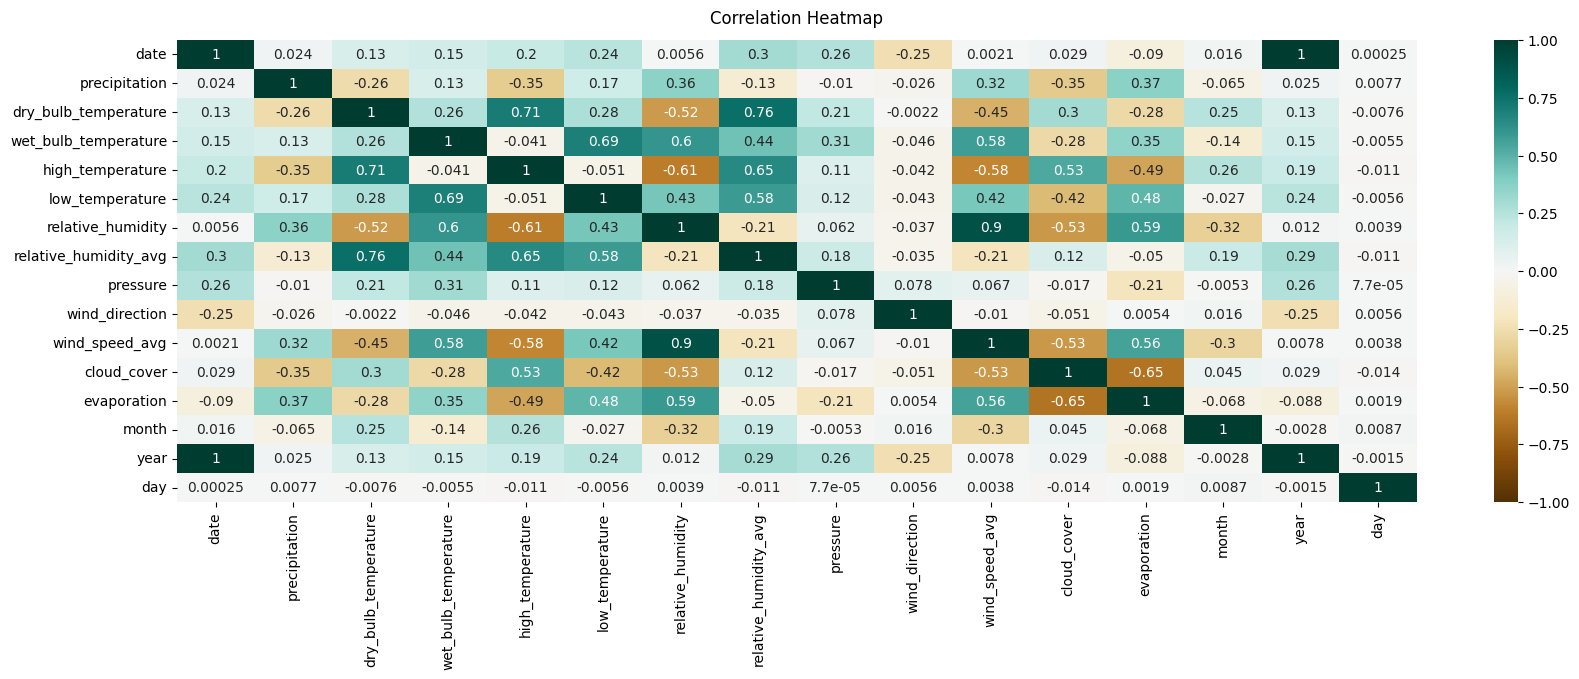

In [82]:
plt.figure(figsize=(20, 6))
corr_heatmap = sns.heatmap(df.iloc[:, 1:].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [83]:
def select_correlations(corr_matrix, threshold):
    n_vars = corr_matrix.shape[0]
    have_corr = []
    
    for i in range(n_vars):
        for j in range(i + 1, n_vars):
            correlation = corr_matrix.iloc[i, j]
            if correlation > threshold:
                have_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))

    return have_corr

In [84]:
selected_correlations = select_correlations(df.iloc[:, 1:].corr(), 0.3)
selected_correlations = sorted(selected_correlations, key=lambda x: x[2], reverse=True)
for correlation in selected_correlations:
    var1, var2, value = correlation
    print(f"Correlation between {var1} and {var2}: {value}")

Correlation between date and year: 0.9998147331918861
Correlation between relative_humidity and wind_speed_avg: 0.8981630085713942
Correlation between dry_bulb_temperature and relative_humidity_avg: 0.7647614531916078
Correlation between dry_bulb_temperature and high_temperature: 0.7076731584878366
Correlation between wet_bulb_temperature and low_temperature: 0.6912228697647608
Correlation between high_temperature and relative_humidity_avg: 0.6507104076676983
Correlation between wet_bulb_temperature and relative_humidity: 0.6036378540047437
Correlation between relative_humidity and evaporation: 0.5917262220435013
Correlation between low_temperature and relative_humidity_avg: 0.5805477071871272
Correlation between wet_bulb_temperature and wind_speed_avg: 0.5763364899733577
Correlation between wind_speed_avg and evaporation: 0.5556018191526696
Correlation between high_temperature and cloud_cover: 0.5346567954186222
Correlation between low_temperature and evaporation: 0.48478323266845474


<hr>

### Question 4

Create time-series plots using python to show the correlations found in the previous question.

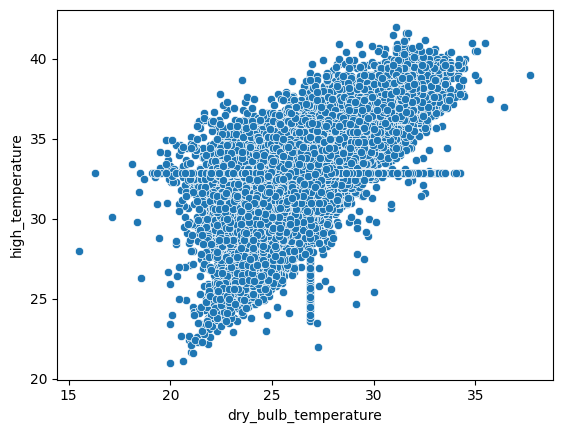

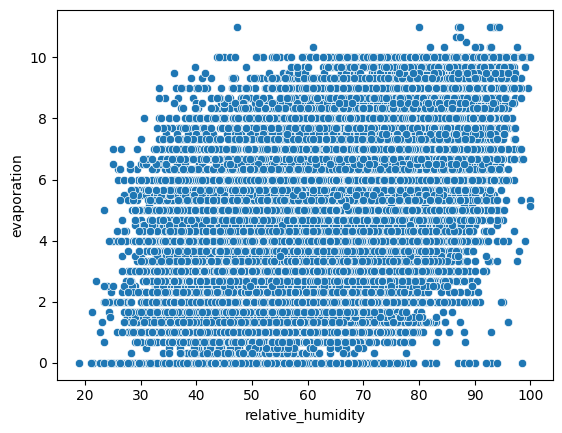

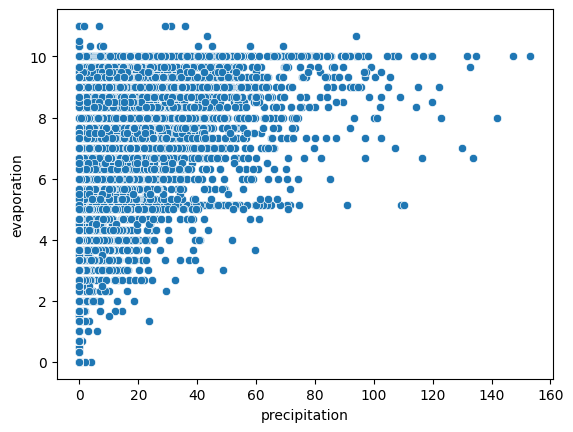

In [85]:
correlations = [("dry_bulb_temperature", "high_temperature"), 
                ("relative_humidity", "evaporation"),
                ("precipitation", "evaporation")
               ]

for i, correlation in enumerate(correlations):
    x, y = correlation
    plt.figure(i)
    sns.scatterplot(df, x=x, y=y)

<hr>

### Question 5

Make an exploratory analysis under the data and present your insights.

In [86]:
df.head()

,cod_city,date,precipitation,dry_bulb_temperature,wet_bulb_temperature,high_temperature,low_temperature,relative_humidity,relative_humidity_avg,pressure,wind_direction,wind_speed_avg,cloud_cover,evaporation,month,year,day
0,59999,1976-09-01,0.0,30.30,19.55,34.1,14.400000,38.00,23.12,979.75,14.00,52.00,10.0,4.50,9,1976,1
1,59999,1976-09-02,0.0,27.23,18.03,34.6,19.738363,44.00,20.50,979.00,13.67,49.00,11.2,1.33,9,1976,2
2,59999,1976-09-03,0.0,27.90,18.23,35.8,14.000000,43.33,24.06,978.40,10.67,47.25,10.7,2.33,9,1976,3
3,59999,1976-09-04,0.0,27.60,18.77,34.5,16.600000,45.33,24.36,978.23,11.00,49.00,10.6,3.00,9,1976,4
4,59999,1976-09-05,0.0,28.40,18.80,36.0,14.100000,43.00,24.04,977.27,22.67,52.00,10.6,4.67,9,1976,5


In [87]:
df.groupby("cod_city")

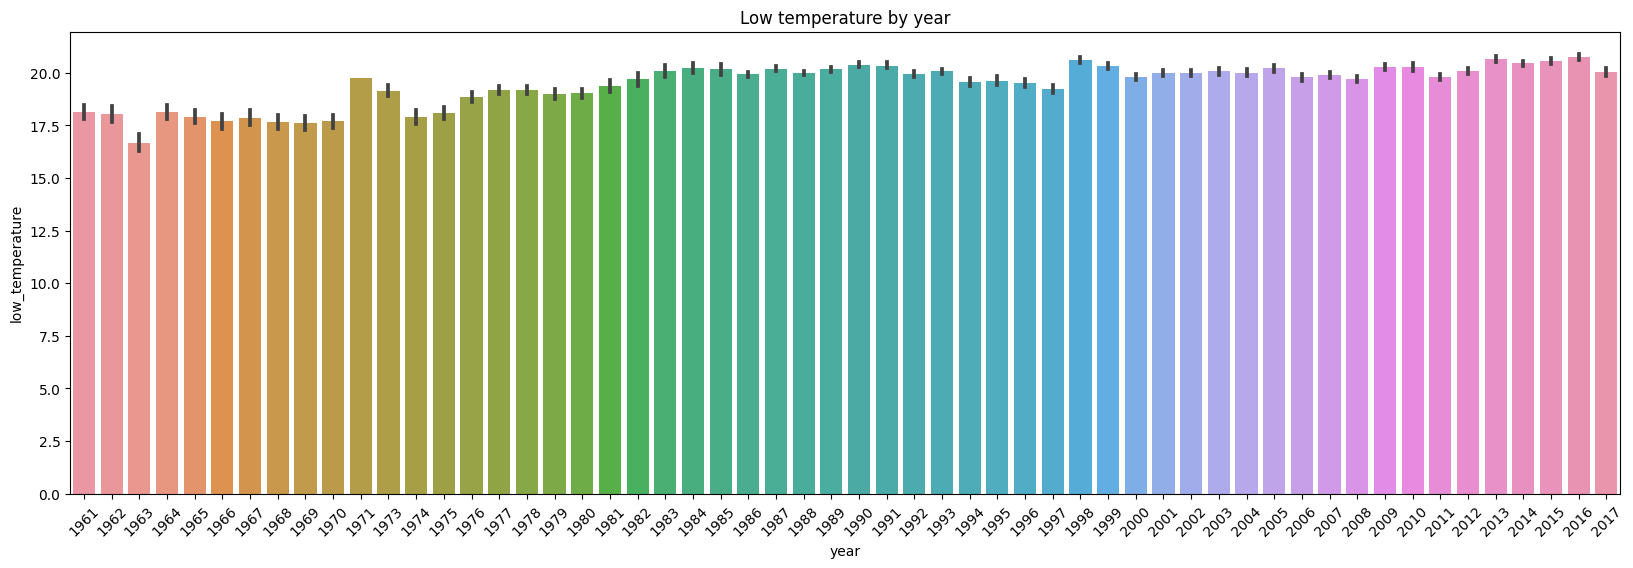

In [89]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title("Low temperature by year")
sns.barplot(df, x="year", y="low_temperature")
plt.show()

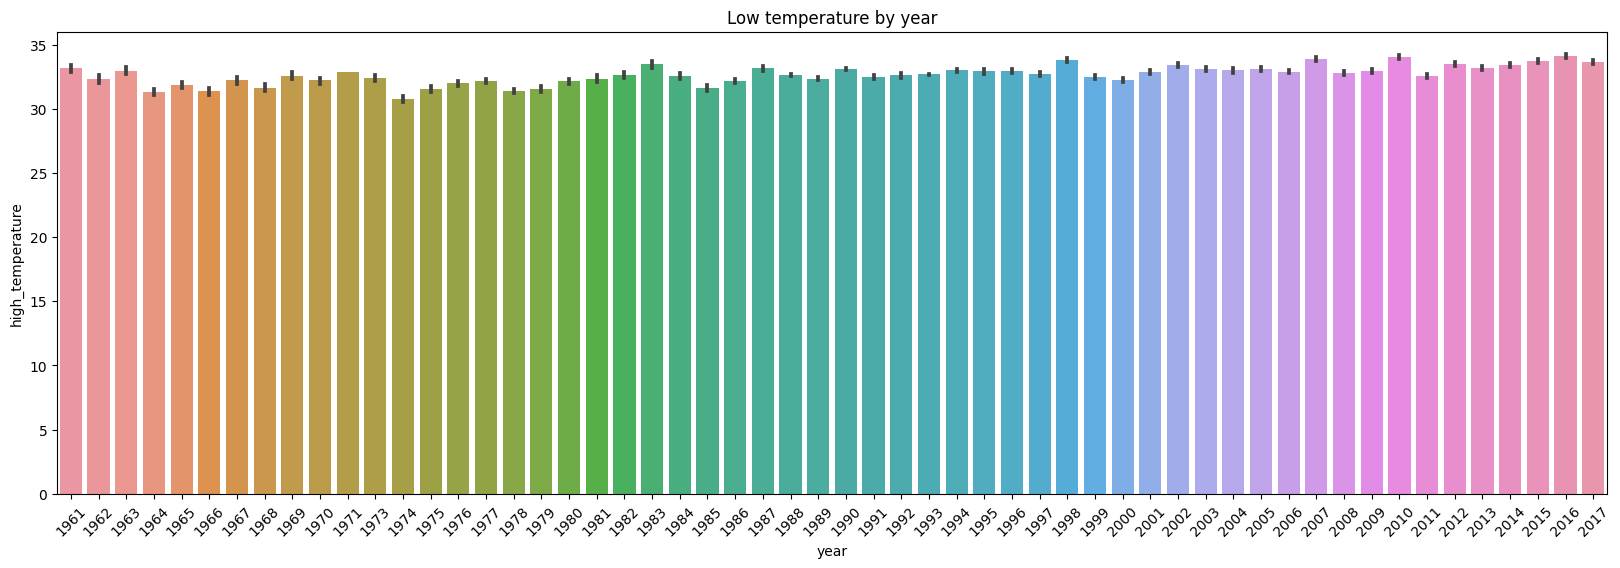

In [90]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title("High temperature by year")
sns.barplot(df, x="year", y="high_temperature")
plt.show()

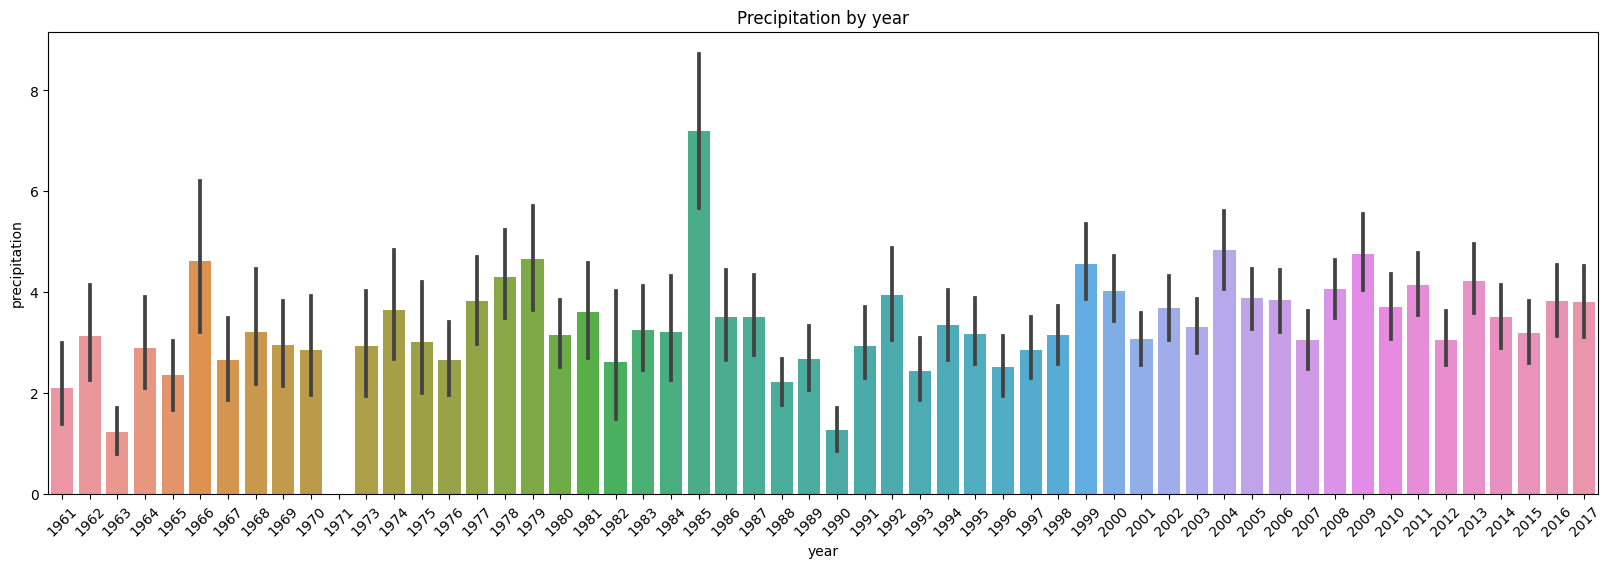

In [91]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title("Precipitation by year")
sns.barplot(df, x="year", y="precipitation")
plt.show()

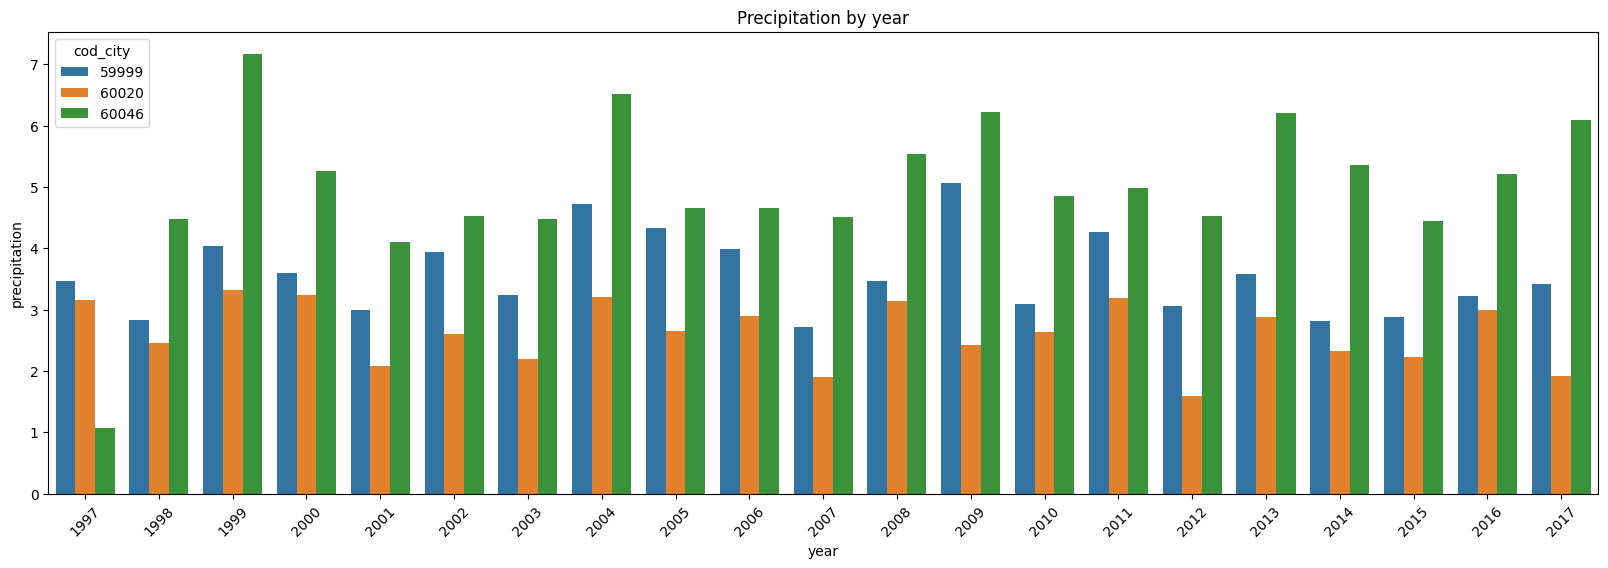

In [103]:
group_precipitation = df.groupby(["year", "cod_city"])["precipitation"].mean().reset_index()
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
plt.title("Precipitation by year")
sns.barplot(group_precipitation[group_precipitation["year"] > 1996], x="year", y="precipitation", hue="cod_city")
plt.show()

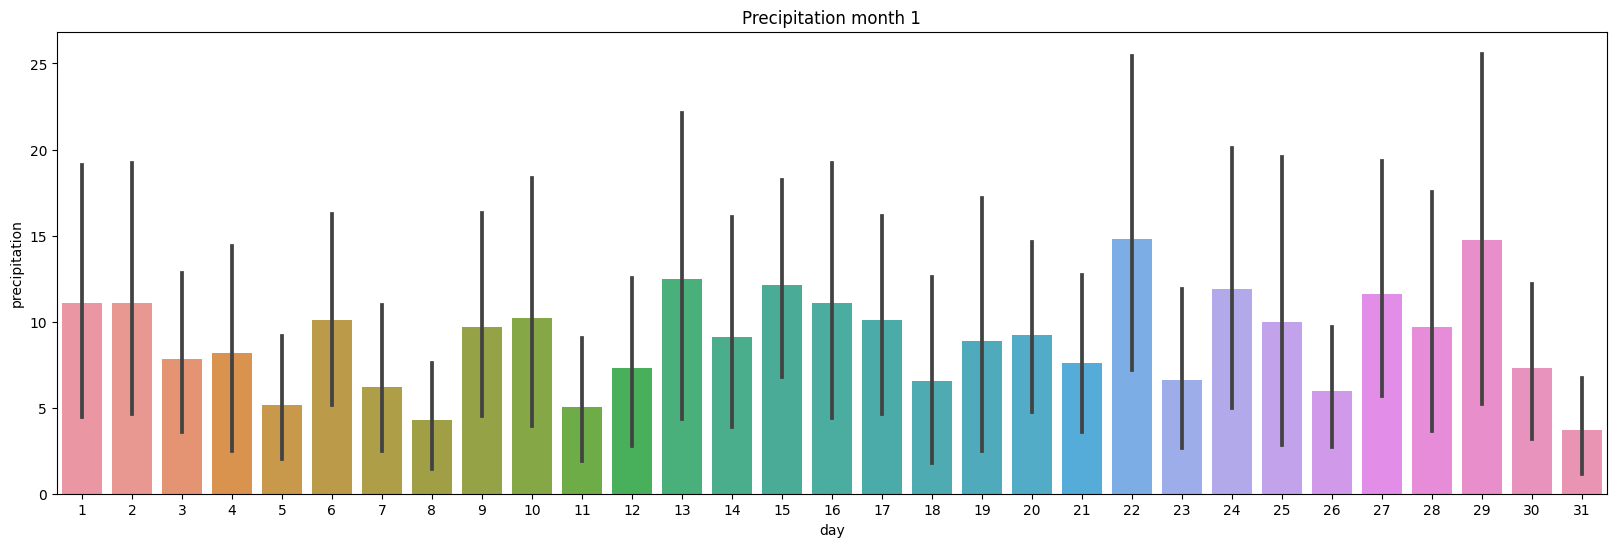

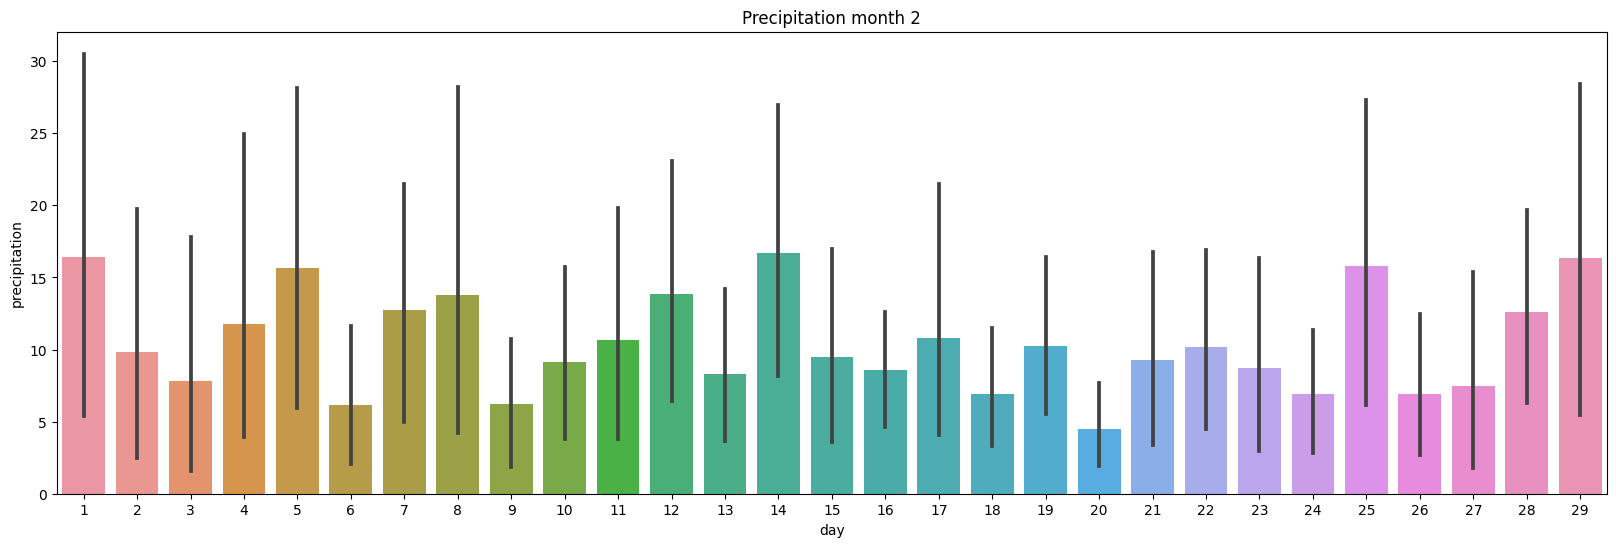

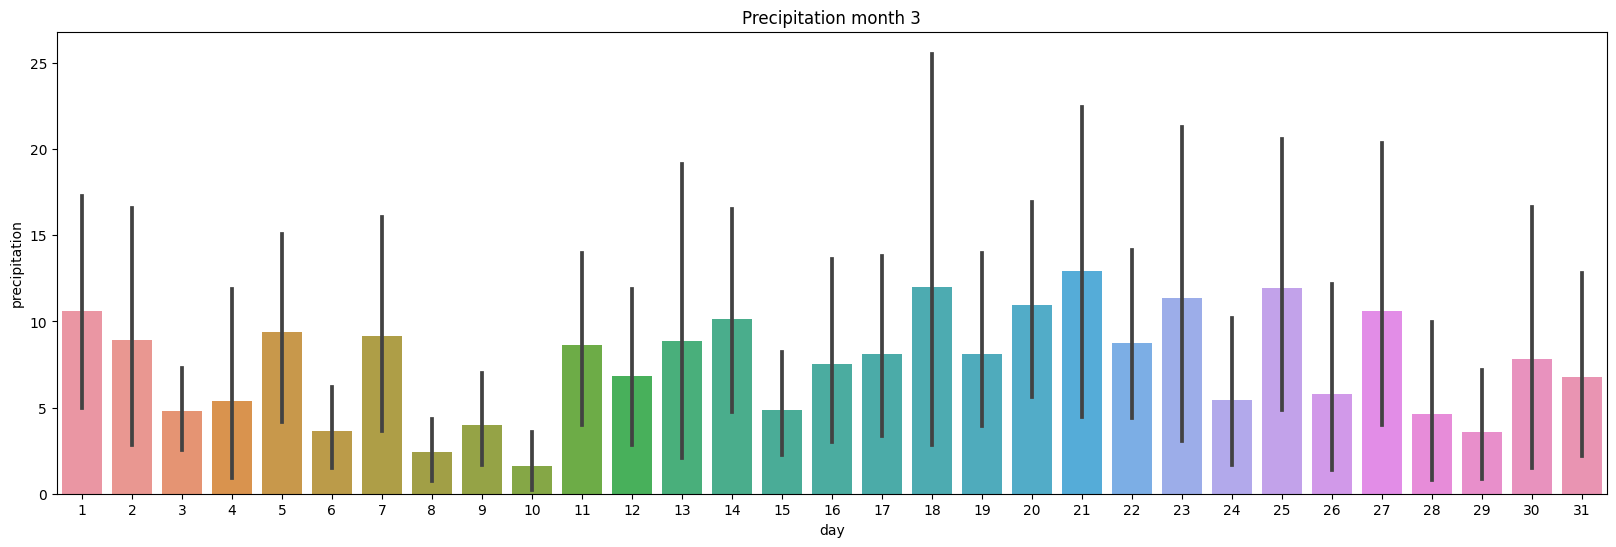

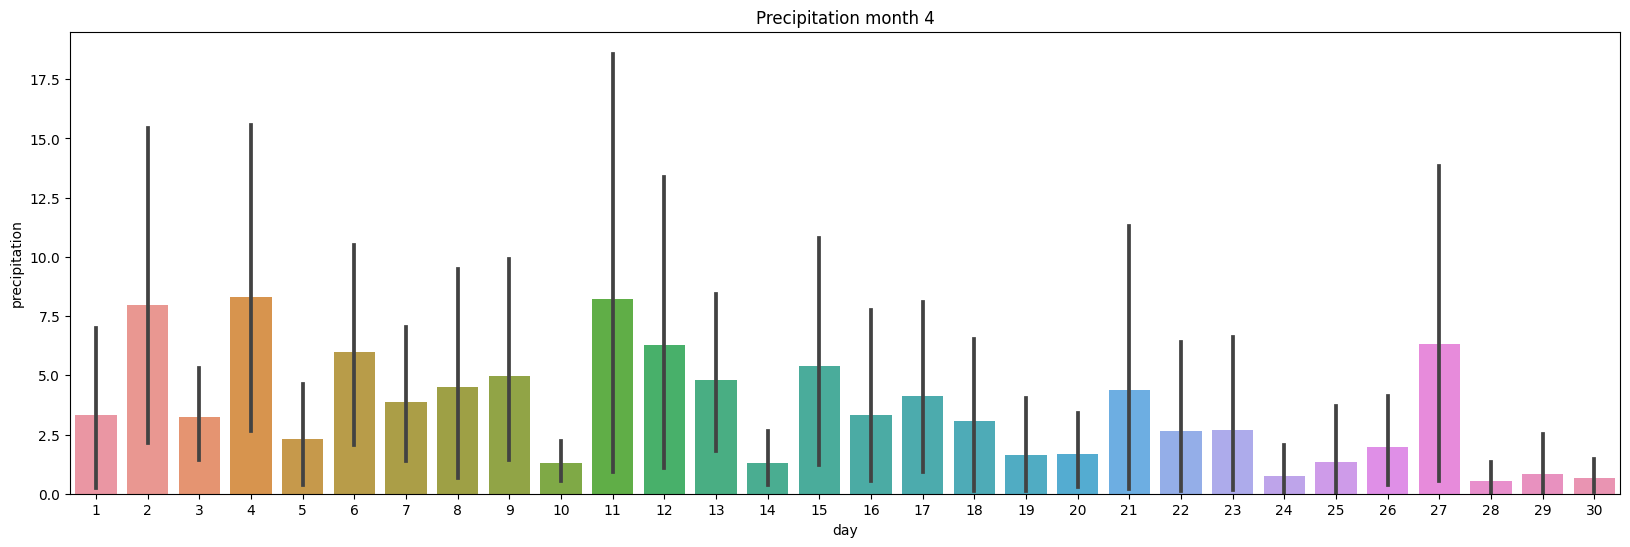

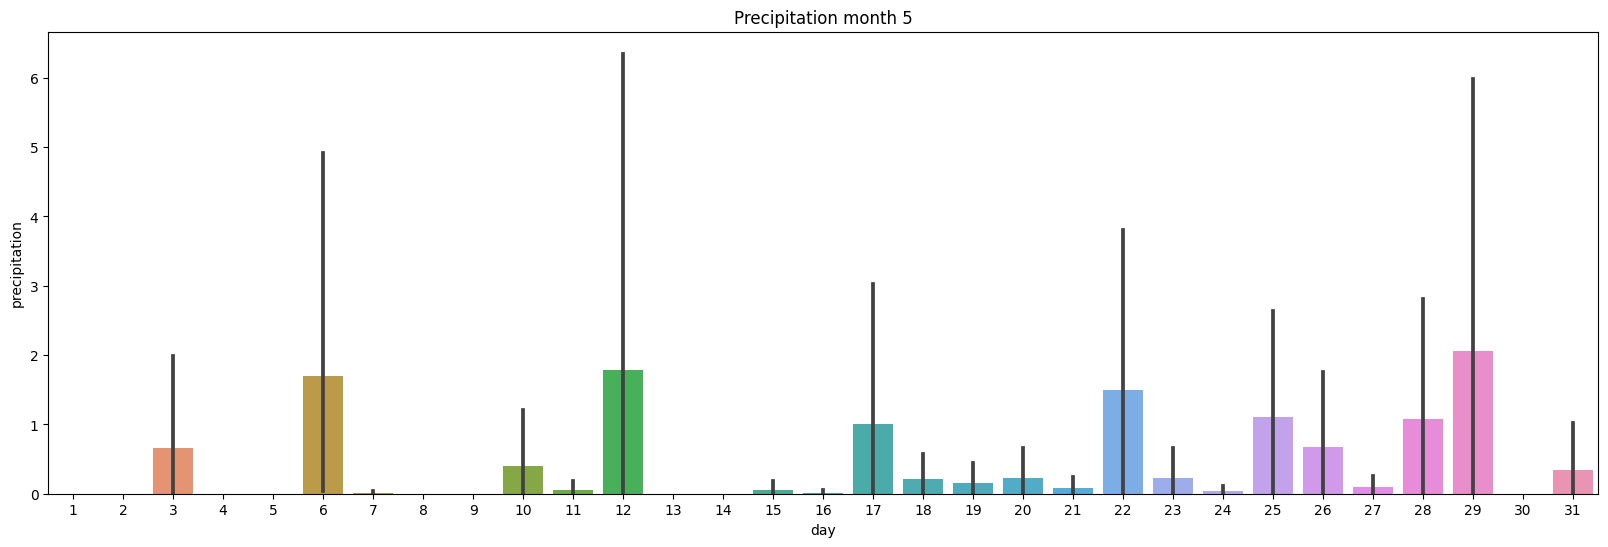

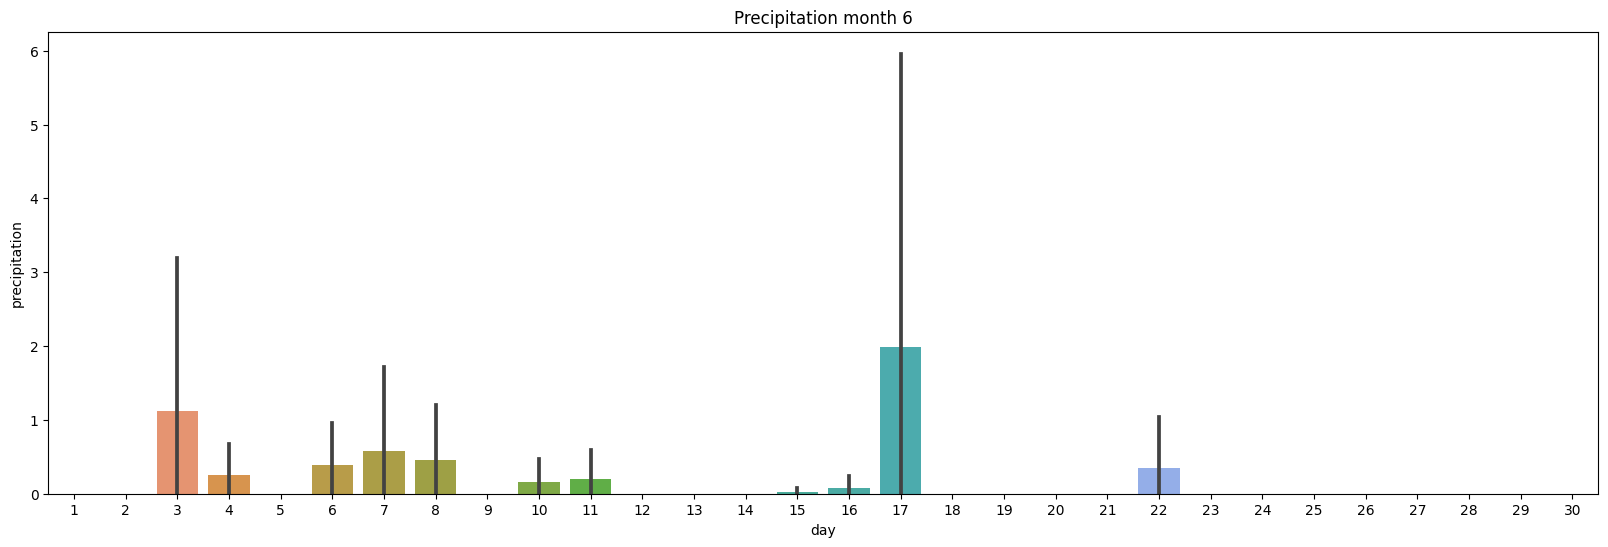

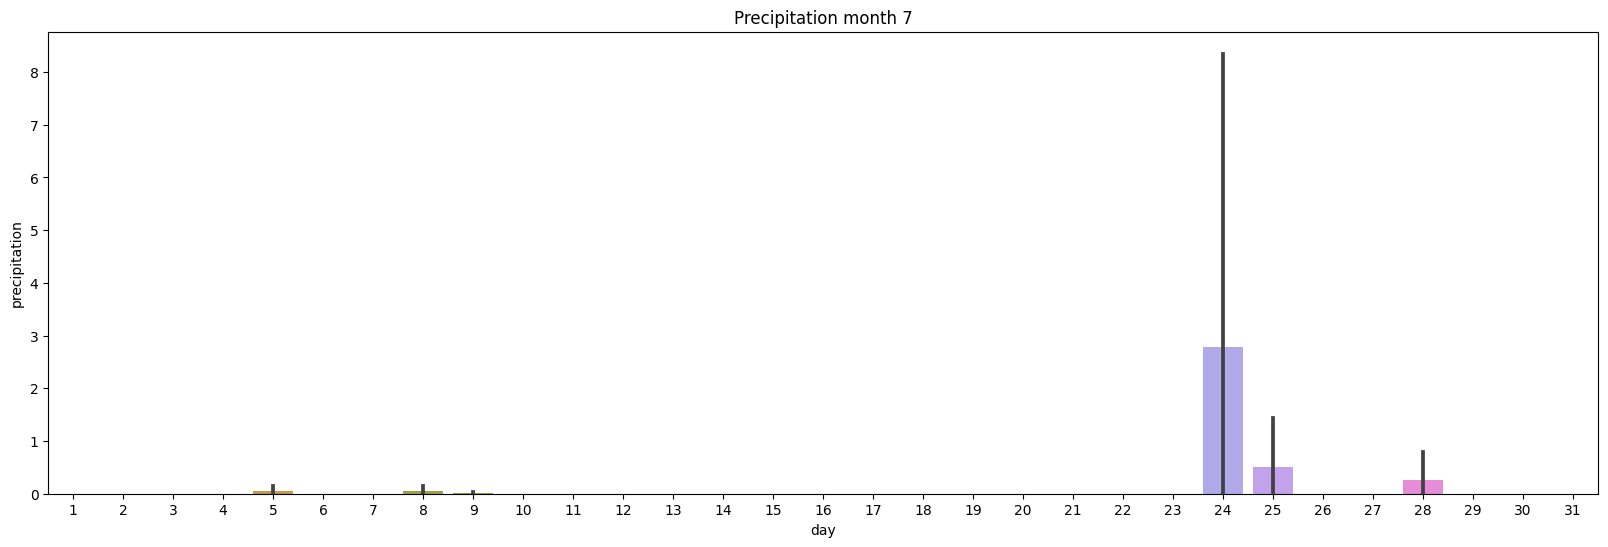

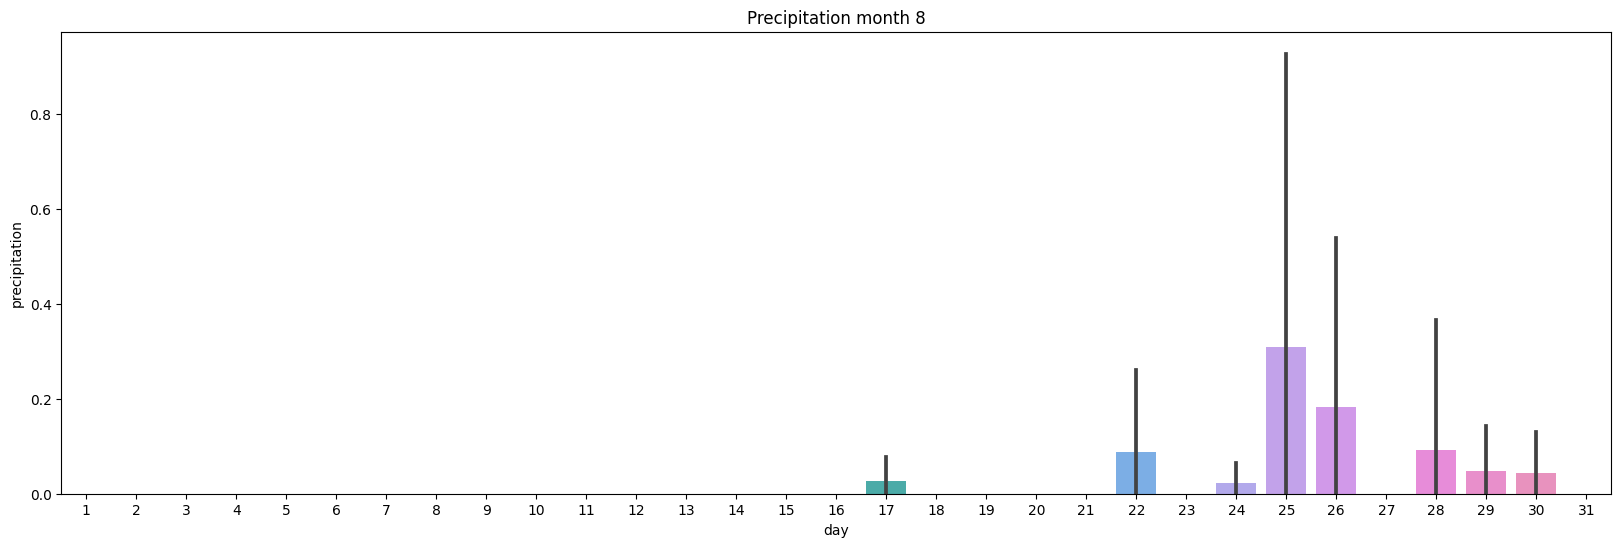

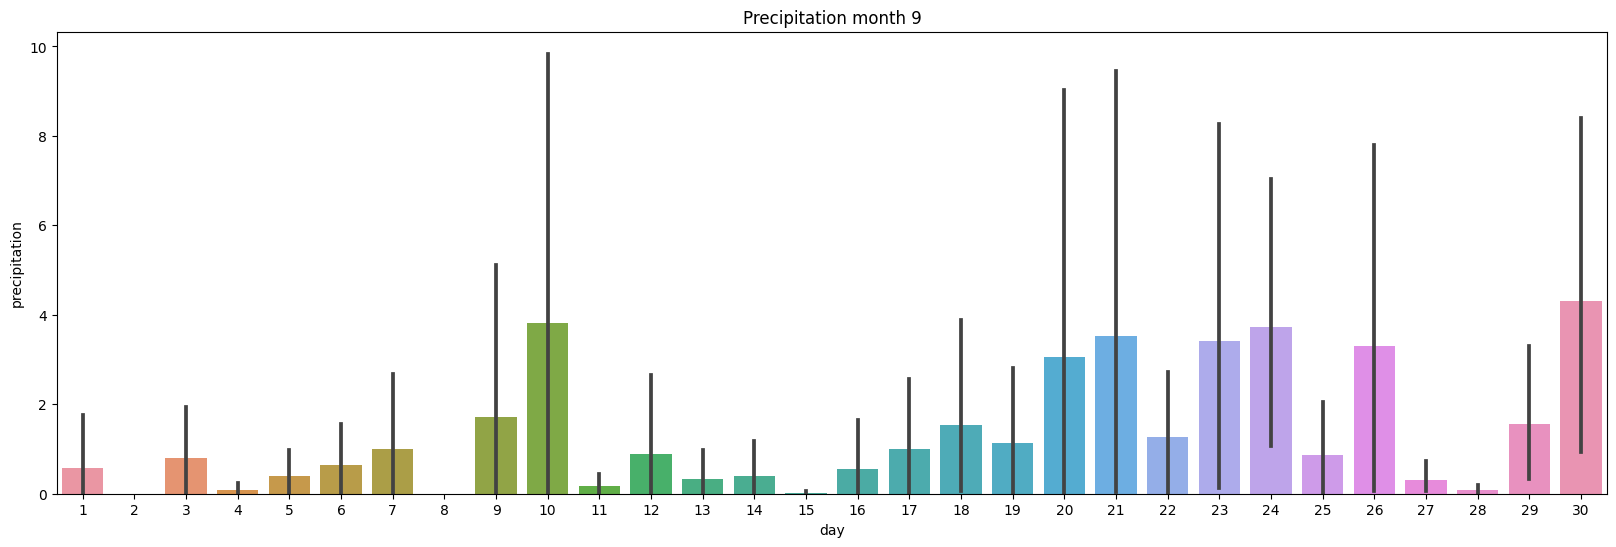

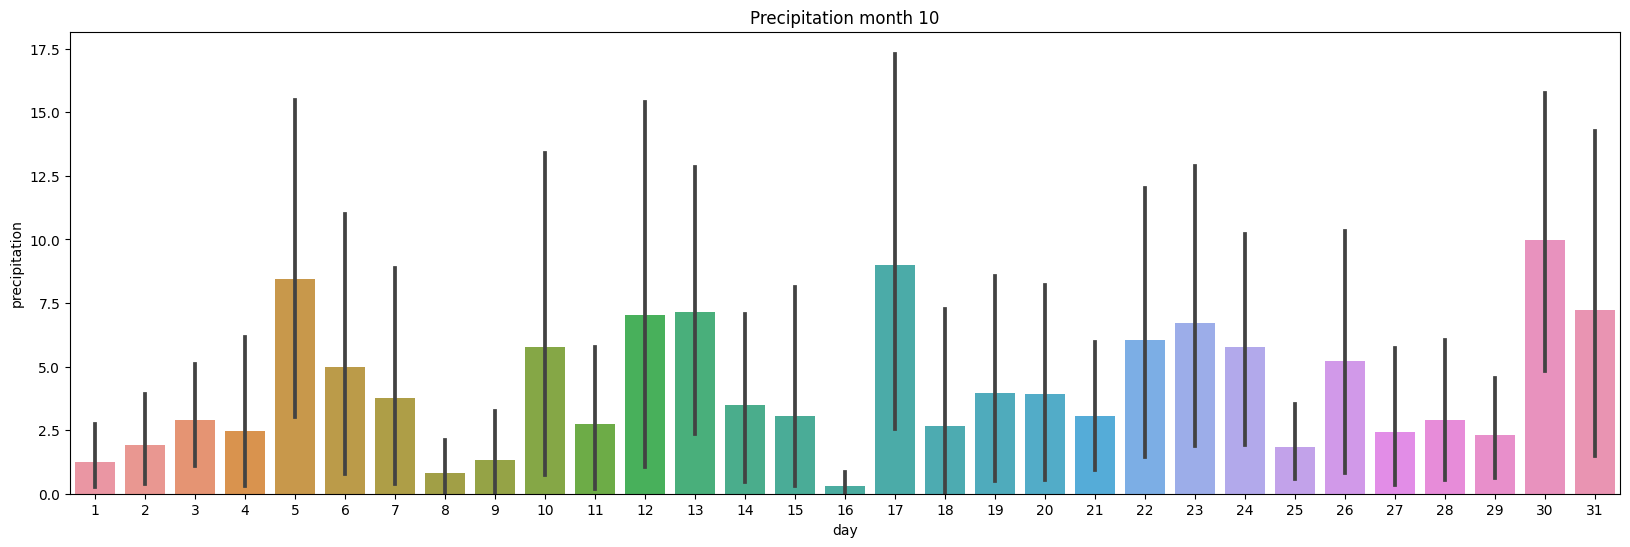

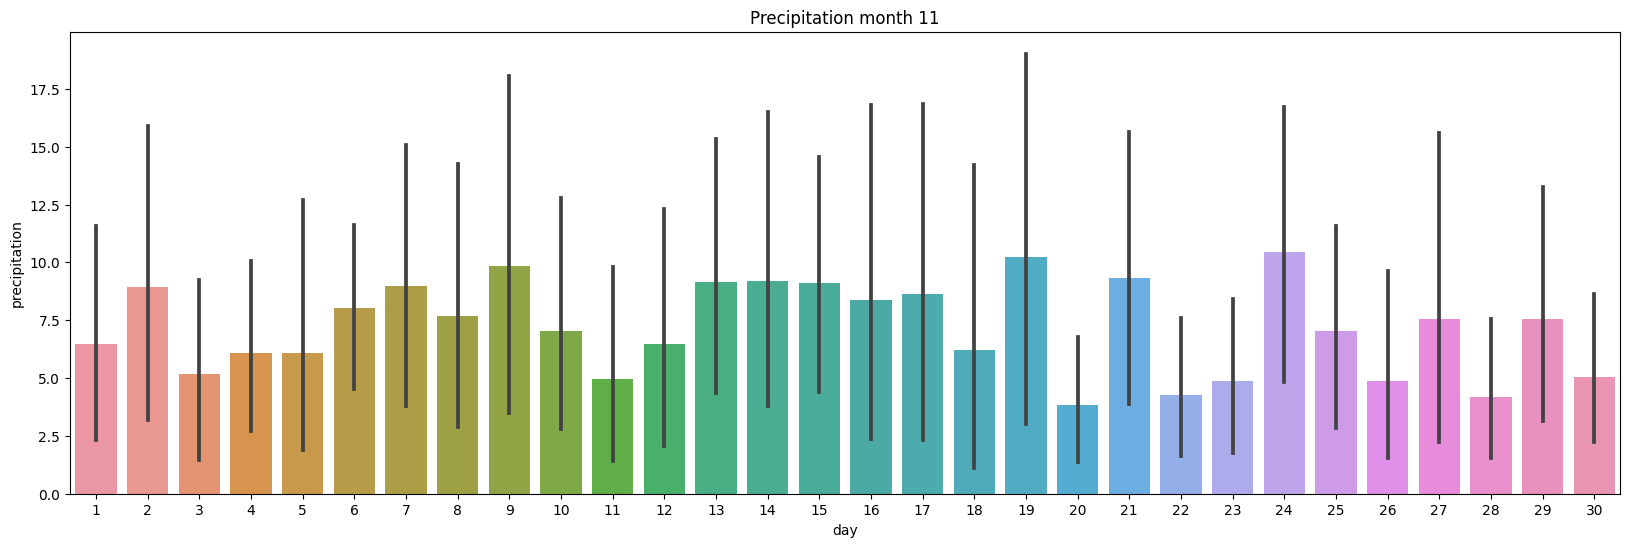

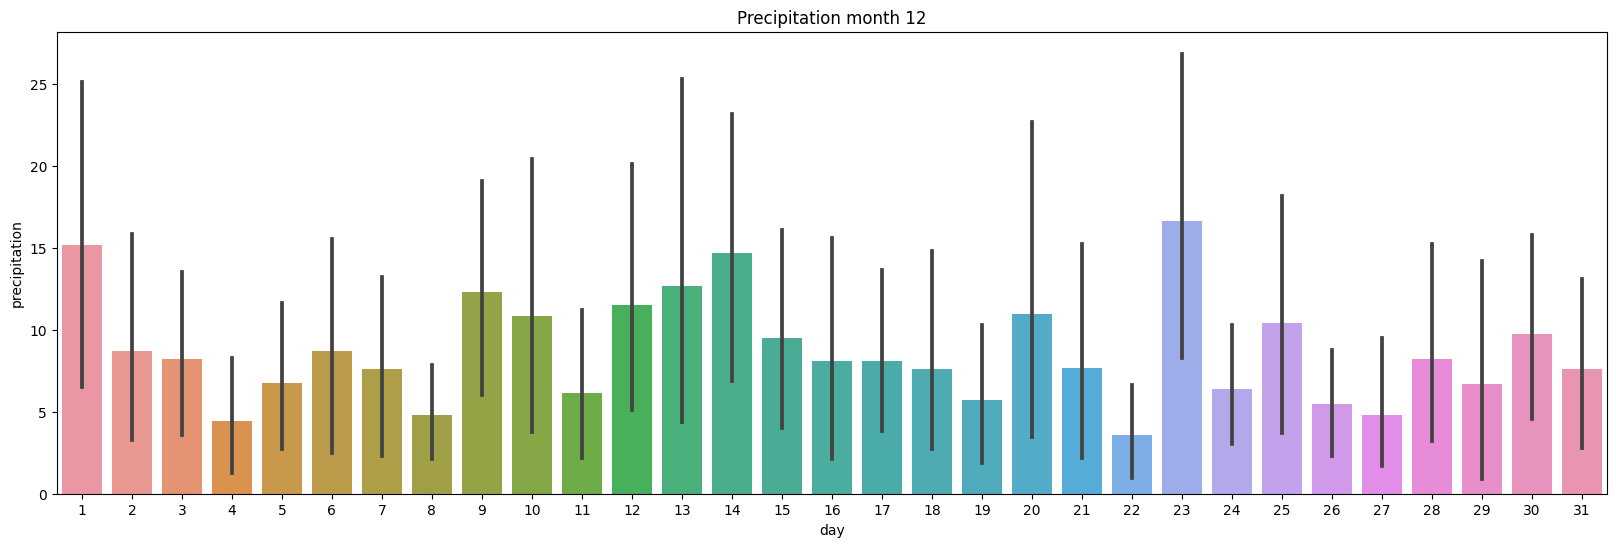

In [109]:
id60046 = df[df["cod_city"] == 60046].reset_index(drop=True)
id60046
for month in range(1, 13):
    plt.figure(month, figsize=(20, 6))
    plt.title(f"Precipitation month {month}")
    sns.barplot(id60046[id60046["month"] == month], x="day", y="precipitation")

<hr>

### Question 6

- Create a Rest API using python framework (e.g., django, fastapi, flask, tornado) in order to provide the weather data inside of grid_weather_data.sql and grid_weather.json

- Create and use any kind of database to make a CRUD to use it later. 

- Try to provide a swagger to describe your API's structure.

- Try to host it in some cloud platform (e.g., heroku, pythonanywhere), and don't forget to provide the link to access it. Otherwise, prepare modules and run server/database in order to (1) run on some env: pip install requirements.txt; (2) them run server.py: python server.py.

- Share below a link to your Rest API code stored in a repository from GitHub.

In [ ]:
http://127.0.0.1:8000/docs#/

<hr>

### Question 7

Make a python script in order to make many requests in parallel to your Rest API that you've created in the previous question.

<hr>